In [1]:
#MPall2000-600cm-1

#analyse du jeu de données MP graminées

In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.DataFrame()

data = pd.read_excel('MPall2000-600cm-1.xlsx')

data.head(50)

,data,Oses totaux,%glucose,%xylose,%arabinose,LK,S/G,%syringyl,%guaiacyl,pcoum,...,617.166,615.237,613.308,611.38,609.451,607.522,605.594,603.665,601.737,599.808
0,MP WHEAT STRAW 1,623,57.0,32.6,4.2,182.0,0.938776,46.00,49.0,4.80,...,0.002832,0.002258,0.001319,0.000000,-0.001709,-0.003747,-0.006433,-0.009119,-0.011805,-0.014491
1,MP F2BM3 INTERNODE 1,663,55.2,36.2,3.9,158.3,0.300792,22.80,75.8,12.20,...,0.001580,0.001564,0.001140,0.000000,-0.002261,-0.005825,-0.009974,-0.014123,-0.018272,-0.022421
2,MP F2 INTERNODE 1,631,60.2,31.1,3.6,186.7,0.907157,46.90,51.7,18.30,...,0.002180,0.002165,0.001525,0.000000,-0.002734,-0.006687,-0.011045,-0.015403,-0.019762,-0.024120
3,MP F2BM1 INTERNODE 2,664,55.6,33.6,4.4,150.4,0.934783,47.30,50.6,10.90,...,-0.001256,-0.000764,-0.000151,0.000000,-0.000932,-0.003454,-0.006975,-0.010497,-0.014019,-0.017540
4,MP Bd 21.3#8,654,54.0,34.4,5.2,162.1,2.079872,65.10,31.3,7.10,...,0.002346,0.001917,0.001212,0.000000,-0.001815,-0.004103,-0.006676,-0.009250,-0.011823,-0.014396
5,MP Bd 4179 CAD STEM 1#1,649,53.3,37.0,4.5,154.9,0.782288,42.40,54.2,5.30,...,-0.003817,-0.002254,-0.000772,0.000000,-0.000556,-0.002693,-0.006435,-0.010177,-0.013919,-0.017662
6,MP F2 ENE 9F 1#1,549,52.5,21.9,10.2,65.9,0.436681,30.00,68.7,0.70,...,0.001489,0.001241,0.000766,0.000000,-0.001146,-0.002670,-0.004741,-0.006812,-0.008883,-0.010954
7,MP F2 ENE FF 1,764,58.4,33.1,3.3,141.9,0.765027,42.00,54.9,14.51,...,-0.000142,0.000759,0.000931,0.000000,-0.002087,-0.005123,-0.008568,-0.012012,-0.015457,-0.018901
8,MP F2 ENE FF 3,764,58.4,33.1,3.3,141.9,0.765027,42.00,54.9,14.51,...,0.000249,0.000791,0.000761,0.000000,-0.001527,-0.003736,-0.006866,-0.009996,-0.013126,-0.016256
9,MP brachy 496 wt (H121) 2,663,51.9,38.0,5.4,168.0,2.034591,64.70,31.8,9.10,...,0.001861,0.001798,0.001594,0.001258,0.000811,0.000277,0.000277,0.000277,0.000277,0.000277


In [3]:
#49 échantillons... c'st tout ce que j'ai pu retrouver.
#et encore : il y a 10 lignines dedans. Vu qu'on se concentre sur les MP, ça réduit le br d'échantillons à 38...
#on ne peut pas faire une prédiction dans les règles avec si peu. Je ne sais pas si je pourrai même obtenir des performances satisfaisantes ave si peu.

#Ouliers attendus : 9F, FF1, FF3  (6, 7, 8)

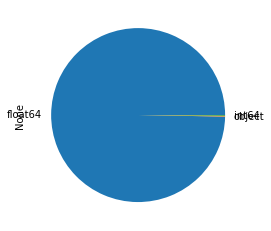

In [4]:
###Analyse des types des variables :

##pourcentage de valeurs en fonction de chaque type d'objets et de valeurs manquantes
data.dtypes.value_counts().plot.pie();

In [5]:
#nombre et type des variables

data.dtypes.value_counts()

float64    736
object       1
int64        1
dtype: int64

<AxesSubplot:>

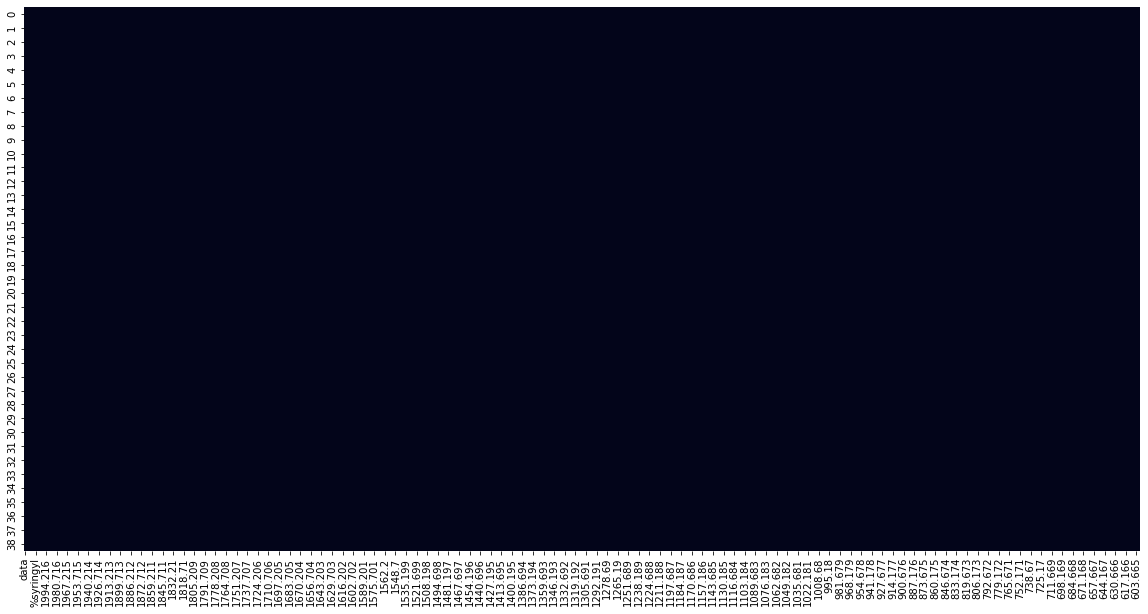

In [6]:
#recherche des nans en graphique
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar = False)

#le jeu est propre, nous pouvons poursuivre vers le prétraitement

In [7]:
#dropper les 9F et FF
#data = data.drop([6, 7, 8])
data.head(40)

,data,Oses totaux,%glucose,%xylose,%arabinose,LK,S/G,%syringyl,%guaiacyl,pcoum,...,617.166,615.237,613.308,611.38,609.451,607.522,605.594,603.665,601.737,599.808
0,MP WHEAT STRAW 1,623,57.0,32.6,4.2,182.0,0.938776,46.00,49.0,4.80,...,0.002832,0.002258,0.001319,0.000000,-0.001709,-0.003747,-0.006433,-0.009119,-0.011805,-0.014491
1,MP F2BM3 INTERNODE 1,663,55.2,36.2,3.9,158.3,0.300792,22.80,75.8,12.20,...,0.001580,0.001564,0.001140,0.000000,-0.002261,-0.005825,-0.009974,-0.014123,-0.018272,-0.022421
2,MP F2 INTERNODE 1,631,60.2,31.1,3.6,186.7,0.907157,46.90,51.7,18.30,...,0.002180,0.002165,0.001525,0.000000,-0.002734,-0.006687,-0.011045,-0.015403,-0.019762,-0.024120
3,MP F2BM1 INTERNODE 2,664,55.6,33.6,4.4,150.4,0.934783,47.30,50.6,10.90,...,-0.001256,-0.000764,-0.000151,0.000000,-0.000932,-0.003454,-0.006975,-0.010497,-0.014019,-0.017540
4,MP Bd 21.3#8,654,54.0,34.4,5.2,162.1,2.079872,65.10,31.3,7.10,...,0.002346,0.001917,0.001212,0.000000,-0.001815,-0.004103,-0.006676,-0.009250,-0.011823,-0.014396
5,MP Bd 4179 CAD STEM 1#1,649,53.3,37.0,4.5,154.9,0.782288,42.40,54.2,5.30,...,-0.003817,-0.002254,-0.000772,0.000000,-0.000556,-0.002693,-0.006435,-0.010177,-0.013919,-0.017662
6,MP F2 ENE 9F 1#1,549,52.5,21.9,10.2,65.9,0.436681,30.00,68.7,0.70,...,0.001489,0.001241,0.000766,0.000000,-0.001146,-0.002670,-0.004741,-0.006812,-0.008883,-0.010954
7,MP F2 ENE FF 1,764,58.4,33.1,3.3,141.9,0.765027,42.00,54.9,14.51,...,-0.000142,0.000759,0.000931,0.000000,-0.002087,-0.005123,-0.008568,-0.012012,-0.015457,-0.018901
8,MP F2 ENE FF 3,764,58.4,33.1,3.3,141.9,0.765027,42.00,54.9,14.51,...,0.000249,0.000791,0.000761,0.000000,-0.001527,-0.003736,-0.006866,-0.009996,-0.013126,-0.016256
9,MP brachy 496 wt (H121) 2,663,51.9,38.0,5.4,168.0,2.034591,64.70,31.8,9.10,...,0.001861,0.001798,0.001594,0.001258,0.000811,0.000277,0.000277,0.000277,0.000277,0.000277


In [8]:
#selection des colonnes
#je veux le % de synringyle en Y, le S/G, le taux de sucres totaux, et la Lignine klason (LK) en Y, et les spectres en X. On restreint aux MP.
#On va tenter une première apprcoche PLS2, puis PLS1 si besoin

#le jeu de calibration
data = data.drop([6])
X = data.iloc[:, 11:]



#les Y pour PLS1
Y_pcoum = data.iloc[:, 9]
Y_SG = data.iloc[:, 6]
Y_syr = data.iloc[:, 7]
Y_gua = data.iloc[:, 8]
Y_oses = data.iloc[:, 1]
Y_LK = data.iloc[:, 5]

#Y pour PLS2
Y = data.iloc[:, [1,5,6,9]]

In [9]:
#On vérfiie nos jeux de données
X.head(50)

,2000.002,1998.074,1996.145,1994.216,1992.288,1990.359,1988.430,1986.502,1984.573,1982.645,...,617.166,615.237,613.308,611.380,609.451,607.522,605.594,603.665,601.737,599.808
0,0.001122,0.001014,0.000907,0.000799,0.000691,0.000411,0.000153,0.000000,-0.000020,0.000071,...,0.002832,0.002258,0.001319,0.000000,-0.001709,-0.003747,-0.006433,-0.009119,-0.011805,-0.014491
1,0.000578,0.000476,0.000374,0.000272,0.000170,0.000000,-0.000080,-0.000030,0.000059,0.000093,...,0.001580,0.001564,0.001140,0.000000,-0.002261,-0.005825,-0.009974,-0.014123,-0.018272,-0.022421
2,0.004399,0.004296,0.004193,0.004091,0.003988,0.003692,0.003513,0.003476,0.003475,0.003467,...,0.002180,0.002165,0.001525,0.000000,-0.002734,-0.006687,-0.011045,-0.015403,-0.019762,-0.024120
3,0.005165,0.005030,0.004895,0.004761,0.004626,0.004353,0.004147,0.004039,0.003954,0.003857,...,-0.001256,-0.000764,-0.000151,0.000000,-0.000932,-0.003454,-0.006975,-0.010497,-0.014019,-0.017540
4,0.000604,0.000501,0.000398,0.000295,0.000192,0.000000,0.000111,0.000537,0.001035,0.001340,...,0.002346,0.001917,0.001212,0.000000,-0.001815,-0.004103,-0.006676,-0.009250,-0.011823,-0.014396
5,0.013272,0.013356,0.013440,0.013524,0.013608,0.013072,0.012555,0.012118,0.011757,0.011452,...,-0.003817,-0.002254,-0.000772,0.000000,-0.000556,-0.002693,-0.006435,-0.010177,-0.013919,-0.017662
7,0.001173,0.001068,0.000963,0.000858,0.000753,0.000317,0.000000,-0.000049,0.000127,0.000376,...,-0.000142,0.000759,0.000931,0.000000,-0.002087,-0.005123,-0.008568,-0.012012,-0.015457,-0.018901
8,0.001248,0.001096,0.000943,0.000791,0.000638,0.000268,0.000000,-0.000061,0.000037,0.000183,...,0.000249,0.000791,0.000761,0.000000,-0.001527,-0.003736,-0.006866,-0.009996,-0.013126,-0.016256
9,0.000713,0.000713,0.000713,0.000713,0.000713,0.000658,0.000644,0.000681,0.000749,0.000806,...,0.001861,0.001798,0.001594,0.001258,0.000811,0.000277,0.000277,0.000277,0.000277,0.000277
10,0.000945,0.000945,0.000945,0.000945,0.000945,0.000923,0.000924,0.000945,0.000975,0.000997,...,0.002109,0.001990,0.001758,0.001404,0.000934,0.000365,0.000365,0.000365,0.000365,0.000365


In [10]:
#on vérifie Y_pcoum
Y_pcoum.head()


0     4.8
1    12.2
2    18.3
3    10.9
4     7.1
Name: pcoum, dtype: float64

In [11]:
#on vérifie Y_sg
Y_SG.head()

0    0.938776
1    0.300792
2    0.907157
3    0.934783
4    2.079872
Name: S/G, dtype: float64

In [12]:
#on vérifie Y_sg
Y_oses.head()

0    623
1    663
2    631
3    664
4    654
Name: Oses totaux, dtype: int64

In [13]:
#on vérifie Y_LK
Y_LK.head()

0    182.0
1    158.3
2    186.7
3    150.4
4    162.1
Name: LK, dtype: float64

In [14]:
#on vérifie Y
Y.head()

,Oses totaux,LK,S/G,pcoum
0,623,182.0,0.938776,4.8
1,663,158.3,0.300792,12.2
2,631,186.7,0.907157,18.3
3,664,150.4,0.934783,10.9
4,654,162.1,2.079872,7.1


In [15]:
#tout est bon, on peut poursuivre.

#prohaine étape : le prétraitement des spectres

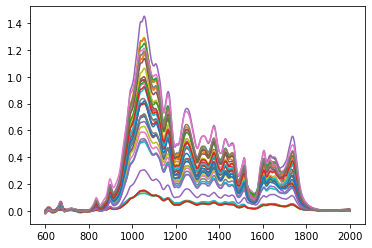

In [16]:
#tracé du spectre brut.
wl = np.arange(0, 727, 1)

plt.plot(X.T)

In [17]:
#spectre non normalisés, ligne de base déjà corrigée (sous OPUS).
#Le lissage devait suffire, il faudra déconvoluer.

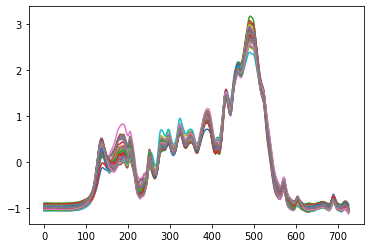

In [18]:
#normalisation

def snv(input_data):   #prend un np.array en argument
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

X = np.array(X)

Xsnv = snv(X)

plt.plot(Xsnv.T)

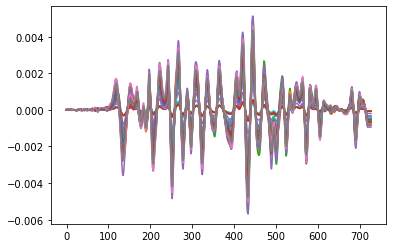

In [19]:
#dérivée 2, fenetre de 17 points
from scipy.signal import savgol_filter
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

plt.plot(X2.T)

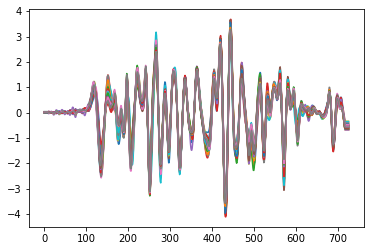

In [20]:
#normalisation des spectres dérivés

def snv(input_data):   #prend un np.array en argument
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

X = np.array(X2)

X2snv = snv(X)

plt.plot(X2snv.T)

In [21]:
#exploitons d'abord les spectres normalisés, avant les spectres dérivés normalisés.

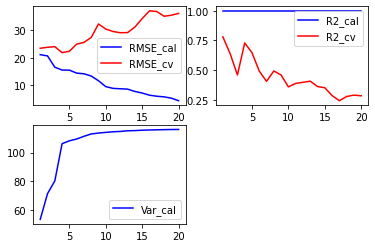

12-14 composantes, un R2 qui stagne vers CP12... la PLS2 n'est pas la meilleure approche
[23.47175578355575, 23.81611387076817, 24.04433551564754, 21.8833911557828, 22.365292378846522, 24.968899373961754, 25.598400413075925, 27.4016724621584, 32.28783088716526, 30.43966091070786, 29.560869254462375, 29.10672961935434, 29.161746724374865, 31.18294702294008, 34.240715924022645, 37.05536347658437, 36.82956335408135, 35.08661358545525, 35.46630662219908, 36.12803079550823]


In [22]:
#Scénario de base : PLS2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
from sklearn.metrics import explained_variance_score
from sklearn import cross_decomposition

R2_cal = []
R2_cv = []
RMSE_cal = []
RMSE_cv = []
Var_cal = []
Var_cv = []

Components = range(1, 21)

for i in Components:
    # Fit
    PLS2 = PLSRegression(n_components = i)
    PLS2.fit(Xsnv, Y)
    Ypred_cal = PLS2.predict(Xsnv)
    
    r2_c = PLS2.score(Xsnv, Ypred_cal)
    rmse_c = math.sqrt(metrics.mean_squared_error(Ypred_cal, Y))
    
    R2_cal.append(r2_c)
    RMSE_cal.append(rmse_c)
    
    # CV & calcul %variance cv
    Ypred_cv = cross_val_predict(PLS2, Xsnv, Y, cv=20)

    r2_v = PLS2.score(Xsnv, Ypred_cv)
    rmse_v = math.sqrt(metrics.mean_squared_error(Ypred_cv, Y))
    
    R2_cv.append(r2_v)
    RMSE_cv.append(rmse_v)

    
#tentative avec analyse de variance   
    
# X is a numpy ndarray with samples in rows and predictor variables in columns
# y is one-dimensional ndarray containing the response variable

total_variance_in_x = np.var(Xsnv, axis = 0)
for i in Components:
    pls2 = cross_decomposition.PLSRegression(n_components = i)
    pls2.fit(Xsnv, Y) 
    
    # variance in transformed X data for each latent vector:
    variance_in_x = np.var(pls2.x_scores_, axis = 0) 

    # normalize variance by total variance:
    fractions_of_explained_variance = variance_in_x / sum(total_variance_in_x) #car X est un spectre : multivariable
    frac_exp_var_cal = sum(fractions_of_explained_variance)
    Var_cal.append(frac_exp_var_cal)
    
    
comp = range(1, 21)  
  
plt.figure()
plt.subplot(2,2,1)
plt.plot(Components, RMSE_cal, c = 'blue', label = 'RMSE_cal')
plt.plot(Components, RMSE_cv, c = 'red', label = 'RMSE_cv')
plt.legend()

plt.subplot(2,2,2)
plt.plot(Components, R2_cal, c = 'blue', label = 'R2_cal')
plt.plot(Components, R2_cv, c = 'red', label = 'R2_cv')
plt.legend()

plt.subplot(2,2,3)
plt.plot(Components, Var_cal, c = 'blue', label = 'Var_cal')
plt.legend()

plt.show()

print("12-14 composantes, un R2 qui stagne vers CP12... la PLS2 n'est pas la meilleure approche")
print(RMSE_cv)

In [23]:
#scénario de base : gridsearchCV
from sklearn.model_selection import GridSearchCV

params = {'n_components' : [1, 20]}
PLS2 = PLSRegression()
grid_pls = GridSearchCV(PLS2, params)
grid_pls.fit(Xsnv, Y)
print(grid_pls.best_params_)
print(grid_pls.best_score_)
print(grid_pls.best_estimator_)

print("réponse de gridsearchCV inaceptable : nous prendrons 10 composantes")

    
    
    
   




{'n_components': 1}
-3.7755830505407886
PLSRegression(n_components=1)
réponse de gridsearchCV inaceptable : nous prendrons 10 composantes


In [24]:
#PLS2 à 10 composantes.
#croyons Unscrambler plutot que Python et gridsearchCV
from decimal import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math


#calibration
PLS2 = PLSRegression(n_components = 10)
PLS2.fit(Xsnv, Y)
Ypred = PLS2.predict(Xsnv)
R2 = PLS2.score(Xsnv, Y)
RMSE = math.sqrt(metrics.mean_squared_error(Ypred, Y))


# Cross-validation
Y_cv = cross_val_predict(PLS2, Xsnv, Y, cv=20)

#Calculer les scores
R2_cv2 = PLS2.score(Xsnv, Y_cv)
RMSE_cv = math.sqrt(metrics.mean_squared_error(Y_cv, Y))


#print les résultats
print(R2)
print(RMSE)
print(R2_cv2)
print(RMSE_cv)





0.8740445081701028
9.529594402878502
0.3586385328283388
30.43966091070786


In [25]:
#abandonnons la PLS2, passons aux PLS1

In [26]:
#PLS1 pcoum

#scénario de base : gridsearchCV
#from sklearn.model_selection import GridSearchCV


for i in range(2, 20):
    
    #calibration
    PLS_pcoum = PLSRegression(n_components = i)
    PLS_pcoum.fit(Xsnv, Y_pcoum)
    Ypred = PLS_pcoum.predict(X2)
    R2 = PLS_pcoum.score(Xsnv, Y_pcoum)
    RMSE = math.sqrt(metrics.mean_squared_error(Ypred, Y_pcoum))


    # Cross-validation
    Y_cv = cross_val_predict(PLS_pcoum, Xsnv, Y_pcoum, cv=20)

    #Calculer les scores
    R2_cv2 = PLS_pcoum.score(Xsnv, Y_cv)
    RMSE_cv = math.sqrt(metrics.mean_squared_error(Y_cv, Y_pcoum))


    #print les résultats
    print("résultats pour" , i , "composantes")
    print("R2" , R2)
    print("RMSE" , RMSE)
    print("R2_cv2" , R2_cv2)
    print("RMSE_cv" , RMSE_cv)
    print(" ")
    
    
#meilleur compromis : 7 composantes

résultats pour 2 composantes
R2 0.7375272580095782
RMSE 14.99463243736636
R2_cv2 0.838622408721704
RMSE_cv 5.711524027429213
 
résultats pour 3 composantes
R2 0.8968626205541094
RMSE 16.45527986957786
R2_cv2 0.8794709005236022
RMSE_cv 4.167634272258804
 
résultats pour 4 composantes
R2 0.9357337464362248
RMSE 12.552824278283499
R2_cv2 0.912033441473785
RMSE_cv 3.7827861819533126
 
résultats pour 5 composantes
R2 0.9639215166856577
RMSE 43.48844407496047
R2_cv2 0.9384433856541985
RMSE_cv 2.7689990624757295
 
résultats pour 6 composantes
R2 0.9772427780374241
RMSE 45.777706883338645
R2_cv2 0.96271180029644
RMSE_cv 2.266995078064619
 
résultats pour 7 composantes
R2 0.9822279694319802
RMSE 35.66211348965421
R2_cv2 0.9743796230114992
RMSE_cv 2.091848404670913
 
résultats pour 8 composantes
R2 0.9849796730853874
RMSE 22.81469304453356
R2_cv2 0.9755229588591334
RMSE_cv 2.06912454683062
 
résultats pour 9 composantes
R2 0.9871550315558753
RMSE 10.241226451809647
R2_cv2 0.9738567087659529
RMSE

ncomp 7
R2 0.9822279694319802
RMSE 1.102596745528098
R2_cv2 0.9743796230114992
RMSE_cv 2.091848404670913


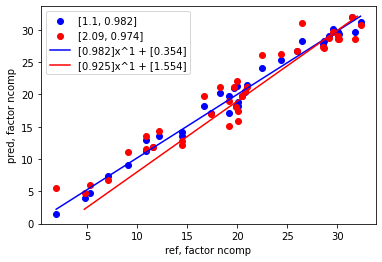

In [27]:
#PLS1 pcoum à 7 composantes.
#croyons Unscrambler plutot que Python et gridsearchCV
from decimal import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math


def PLS1(xx, yy, ncomp):
    #calibration
    PLS_sg = PLSRegression(n_components = ncomp)
    PLS_sg.fit(xx, yy)
    Ypred = PLS_sg.predict(xx)
    R2 = PLS_sg.score(xx, yy)
    RMSE = math.sqrt(metrics.mean_squared_error(Ypred, yy))


    # Cross-validation
    Y_cv = cross_val_predict(PLS_sg, xx, yy, cv=20)

    #Calculer les scores
    R2_cv2 = PLS_sg.score(xx, Y_cv)
    RMSE_cv = math.sqrt(metrics.mean_squared_error(Y_cv, yy))


    #print les résultats
    print("ncomp", ncomp)
    print("R2", R2)
    print("RMSE", RMSE)
    print("R2_cv2", R2_cv2)
    print("RMSE_cv", RMSE_cv)



    def regression(x, y, deg=1):
        coeffs = np.polyfit(x, y, deg=deg)
        text = ''
        for i, coeff in zip([k for k in range(len(coeffs))][::-1], coeffs):
            text += f'{np.round(coeff,3)}x^{i} + '
        def fonction(x):
            s = 0
            for i, coeff in enumerate(coeffs[::-1]):
                s += coeff*x**i 
            return s
        return fonction, coeffs, text[:-6]


    f, coeffs, equation = regression(yy, Ypred)
    f_cv, coeffs_cv, equation_cv = regression(yy, Y_cv)

    plt.figure()
    plt.scatter(yy, Ypred, label= [round(RMSE, 2), round(R2, 3)], c = 'blue')
    plt.scatter(yy, Y_cv, label= [round(RMSE_cv, 2), round(R2_cv2, 3)], c = 'red')

    x_droite = [yy.min(), yy.max()]
    y_droite = [f(i) for i in x_droite]
    plt.plot(x_droite, y_droite, label=equation, c = 'blue')

    x_droite_cv = [Y_cv.min(), Y_cv.max()]
    y_droite_cv = [f(i) for i in x_droite]
    plt.plot(x_droite_cv, y_droite_cv, label=equation_cv, c = 'red')

    plt.xlabel("ref, factor ncomp")
    plt.ylabel('pred, factor ncomp')
    plt.legend()
    plt.show()
    
    
PLS1(Xsnv, Y_pcoum, 7)



In [28]:
#très bon résultat pour la prédiction de pcoum.

In [29]:
#PLS1 S/G

#scénario de base : gridsearchCV
#from sklearn.model_selection import GridSearchCV


for i in range(2, 20):
    
    #calibration
    PLS_SG = PLSRegression(n_components = i)
    PLS_SG.fit(Xsnv, Y_SG)
    Ypred = PLS_SG.predict(Xsnv)
    R2 = PLS_pcoum.score(Xsnv, Y_SG)
    RMSE = math.sqrt(metrics.mean_squared_error(Ypred, Y_SG))


    # Cross-validation
    Y_cv = cross_val_predict(PLS_SG, Xsnv, Y_SG, cv=20)

    #Calculer les scores
    R2_cv2 = PLS_pcoum.score(Xsnv, Y_cv)
    RMSE_cv = math.sqrt(metrics.mean_squared_error(Y_cv, Y_SG))


    #print les résultats
    print("résultats pour" , i , "composantes")
    print("R2" , R2)
    print("RMSE" , RMSE)
    print("R2_cv2" , R2_cv2)
    print("RMSE_cv" , RMSE_cv)
    print(" ")
    
    
#meilleur compromis : aucun, que des R2 négatifs... prenons 10 composantes

résultats pour 2 composantes
R2 -243.97346864303472
RMSE 1.0610375450028837
R2_cv2 -765.2388832469329
RMSE_cv 1.437129834232002
 
résultats pour 3 composantes
R2 -243.97346864303472
RMSE 0.8823660098536654
R2_cv2 -540.3103889661171
RMSE_cv 1.2794000283917306
 
résultats pour 4 composantes
R2 -243.97346864303472
RMSE 0.8106875665516045
R2_cv2 -529.71484555159
RMSE_cv 1.3545070883594905
 
résultats pour 5 composantes
R2 -243.97346864303472
RMSE 0.711228347720164
R2_cv2 -359.3222632760747
RMSE_cv 1.3851002176500429
 
résultats pour 6 composantes
R2 -243.97346864303472
RMSE 0.5645402269138798
R2_cv2 -253.84668448947187
RMSE_cv 1.459958964200003
 
résultats pour 7 composantes
R2 -243.97346864303472
RMSE 0.4893369396436685
R2_cv2 -269.80140277880076
RMSE_cv 1.448917549699684
 
résultats pour 8 composantes
R2 -243.97346864303472
RMSE 0.398849443681624
R2_cv2 -261.1498141419687
RMSE_cv 1.3457839622867713
 
résultats pour 9 composantes
R2 -243.97346864303472
RMSE 0.38461736419827086
R2_cv2 -227

ncomp 2
R2 0.3045971793838794
RMSE 1.0610375450028837
R2_cv2 0.6213038201337268
RMSE_cv 1.437129834232002


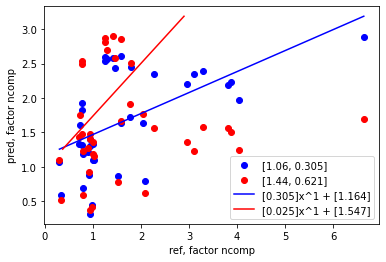

ncomp 3
R2 0.5190803919978868
RMSE 0.8823660098536654
R2_cv2 0.6171231978625888
RMSE_cv 1.2794000283917306


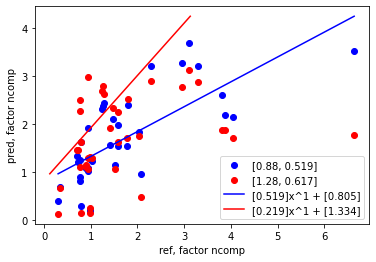

ncomp 4
R2 0.5940411916364803
RMSE 0.8106875665516045
R2_cv2 0.38582705360733194
RMSE_cv 1.3545070883594905


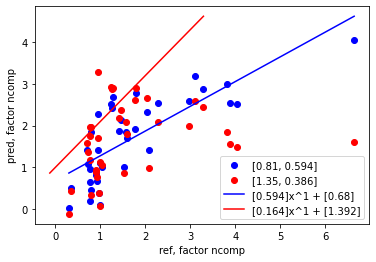

ncomp 5
R2 0.6875409840413316
RMSE 0.711228347720164
R2_cv2 0.4358362925862507
RMSE_cv 1.3851002176500429


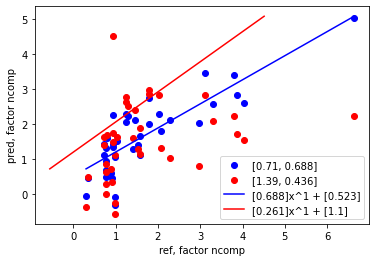

ncomp 6
R2 0.8031367133916726
RMSE 0.5645402269138798
R2_cv2 0.1736628880550718
RMSE_cv 1.459958964200003


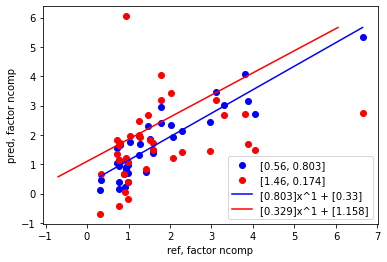

ncomp 7
R2 0.8520922442513339
RMSE 0.4893369396436685
R2_cv2 0.12155730362167516
RMSE_cv 1.448917549699684


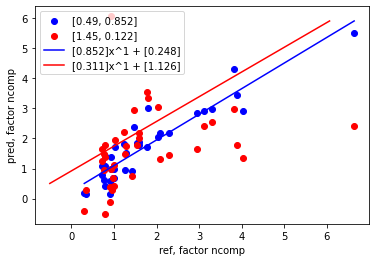

ncomp 8
R2 0.9017363423808511
RMSE 0.398849443681624
R2_cv2 0.19112924541731446
RMSE_cv 1.3457839622867713


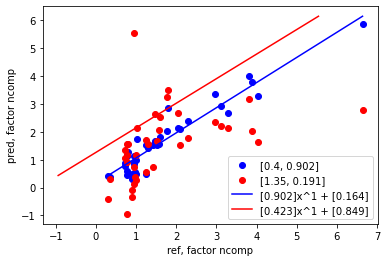

ncomp 9
R2 0.9086238787781485
RMSE 0.38461736419827086
R2_cv2 0.1819963106943563
RMSE_cv 1.4101912162052663


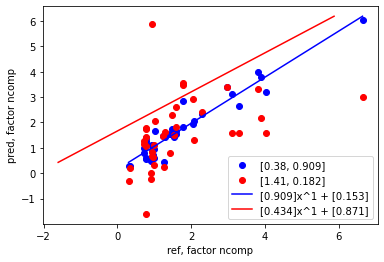

ncomp 10
R2 0.9237432678500188
RMSE 0.3513594373826084
R2_cv2 0.05444388819818169
RMSE_cv 1.4320582309752343


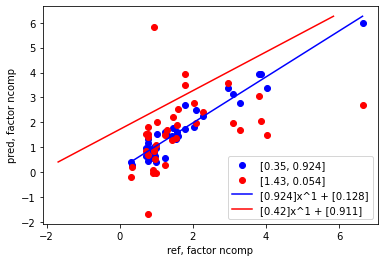

ncomp 11
R2 0.9351944770623057
RMSE 0.32390566037317264
R2_cv2 0.09414357657162631
RMSE_cv 1.4070626001385818


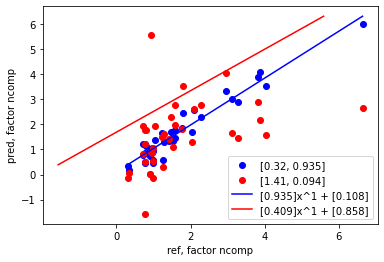

ncomp 12
R2 0.9488587654784417
RMSE 0.28773860353753145
R2_cv2 0.09448061877759706
RMSE_cv 1.4453508189190551


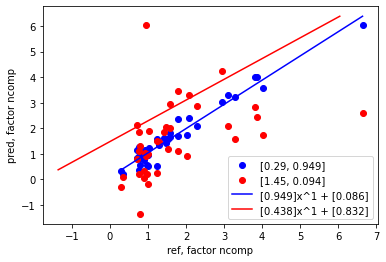

ncomp 13
R2 0.9572021373181968
RMSE 0.2632228386262338
R2_cv2 0.10472970511220048
RMSE_cv 1.4836972527071495


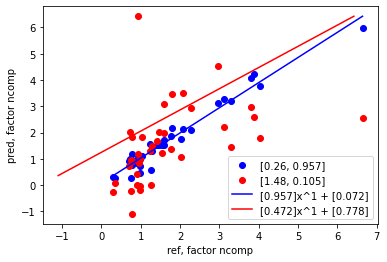

ncomp 14
R2 0.9710354389237716
RMSE 0.21654392463277614
R2_cv2 0.024675760240021938
RMSE_cv 1.5041324256059982


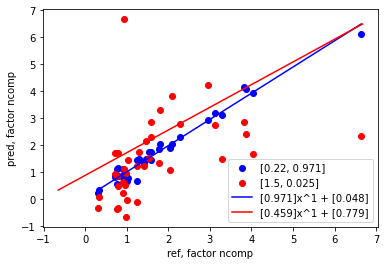

ncomp 15
R2 0.97272690448869
RMSE 0.21012597640649208
R2_cv2 0.034343453257393186
RMSE_cv 1.540033691994567


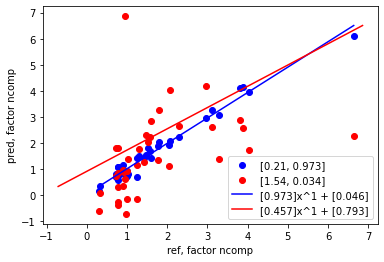

ncomp 16
R2 0.9799186649410294
RMSE 0.18030543543825733
R2_cv2 0.02706806169288667
RMSE_cv 1.4821014626451758


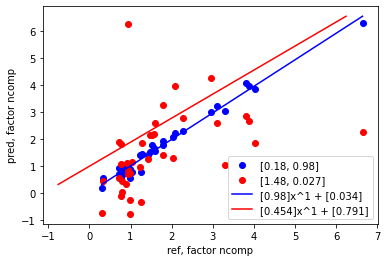

ncomp 17
R2 0.9851914076698102
RMSE 0.15483509915201568
R2_cv2 -0.04518503442597499
RMSE_cv 1.5173918931744135


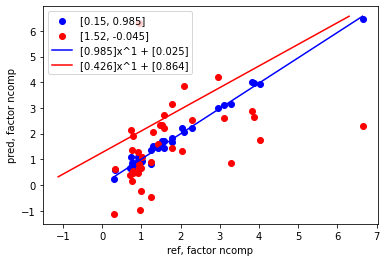

ncomp 18
R2 0.9901050087431551
RMSE 0.12656692685554174
R2_cv2 -0.11645393745092059
RMSE_cv 1.5149533059748872


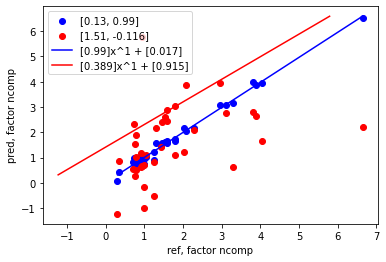

ncomp 19
R2 0.9923688959107699
RMSE 0.11114916809386596
R2_cv2 -0.11691718625235414
RMSE_cv 1.492029947779999


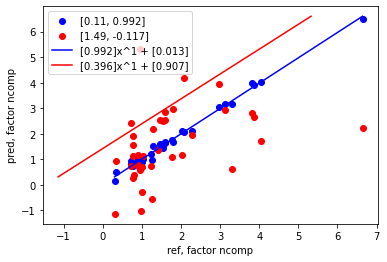

In [30]:
for i in range(2, 20):
    PLS1(Xsnv, Y_SG, i)

In [31]:
#très mauvaise prédiction. Au moins 3 outliers.
#inutilisable

ncomp 2
R2 0.3674863730506118
RMSE 30.943998076761634
R2_cv2 -0.02955053944908581
RMSE_cv 51.60206093830252


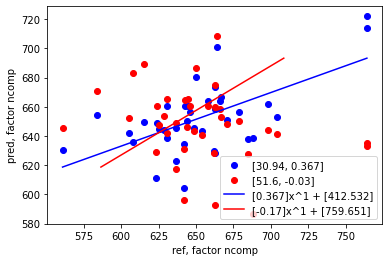

ncomp 3
R2 0.45496422422635874
RMSE 28.724599834011364
R2_cv2 0.051823711929141814
RMSE_cv 47.39857905242901


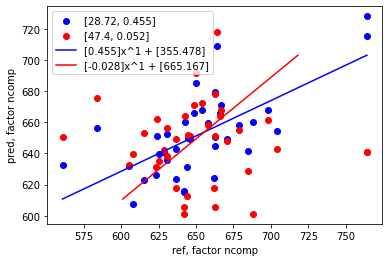

ncomp 4
R2 0.47460359694501664
RMSE 28.202332582138332
R2_cv2 0.1003414623517207
RMSE_cv 47.77516301492799


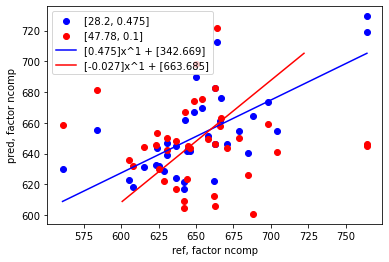

ncomp 5
R2 0.5768204412150515
RMSE 25.310680569731353
R2_cv2 -0.18385913823825106
RMSE_cv 57.46272989274915


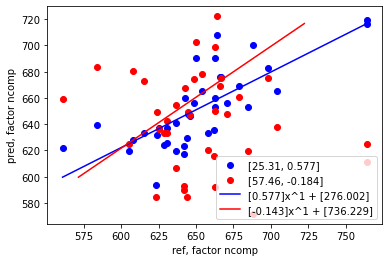

ncomp 6
R2 0.7211703664189263
RMSE 20.54522710154105
R2_cv2 -0.27375354747812786
RMSE_cv 62.52303309428332


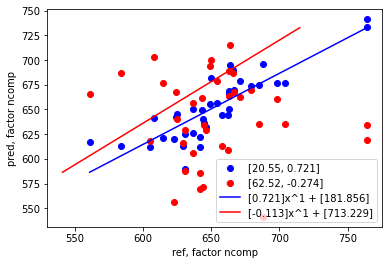

ncomp 7
R2 0.767242033038496
RMSE 18.771274463885224
R2_cv2 -0.30891300136668165
RMSE_cv 57.91686037416656


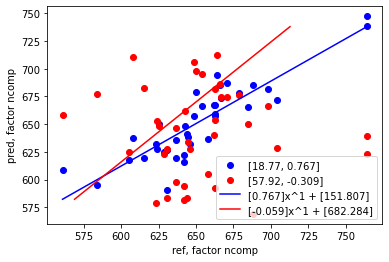

ncomp 8
R2 0.7953843112341876
RMSE 17.599930268569086
R2_cv2 -0.39293572408095034
RMSE_cv 55.909656291048


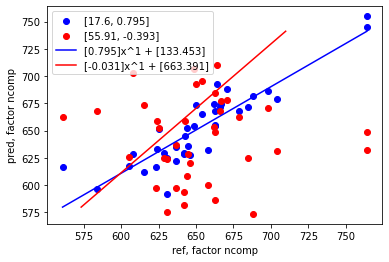

ncomp 9
R2 0.8316558292911711
RMSE 15.963956050323555
R2_cv2 -0.4951789102369788
RMSE_cv 56.428373729766186


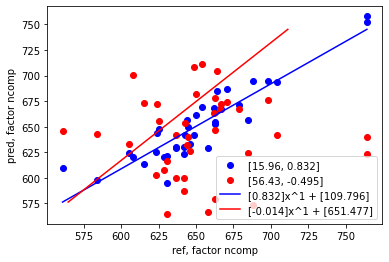

ncomp 10
R2 0.8461272010548188
RMSE 15.262385154989001
R2_cv2 -0.37927731853613555
RMSE_cv 57.761050867884386


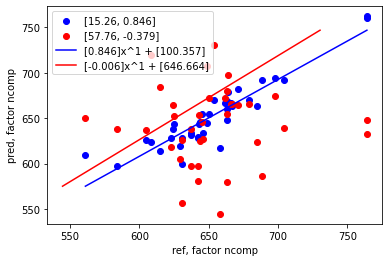

ncomp 11
R2 0.8670848226454748
RMSE 14.184981369958194
R2_cv2 -0.4597697649591279
RMSE_cv 60.407264687471894


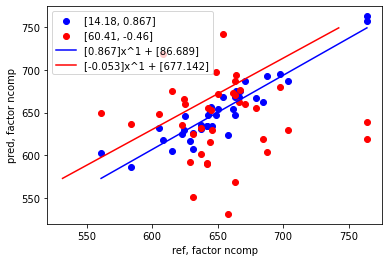

ncomp 12
R2 0.8858648482620795
RMSE 13.144715549719185
R2_cv2 -0.4930748284392936
RMSE_cv 61.44994798406573


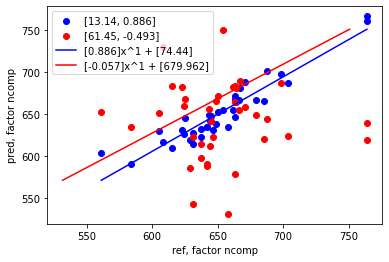

ncomp 13
R2 0.9089692128831344
RMSE 11.73912240762885
R2_cv2 -0.4297673378659945
RMSE_cv 66.97686440825795


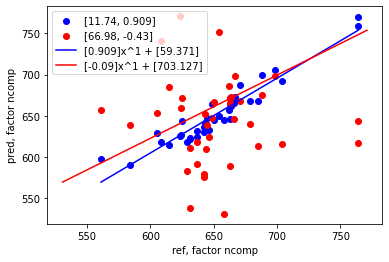

ncomp 14
R2 0.9403593977401464
RMSE 9.501944564797936
R2_cv2 -0.448523341202707
RMSE_cv 69.9406181181366


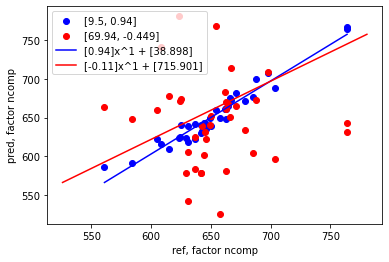

ncomp 15
R2 0.958103381227375
RMSE 7.963994835351518
R2_cv2 -0.44974733434567526
RMSE_cv 72.6334236401218


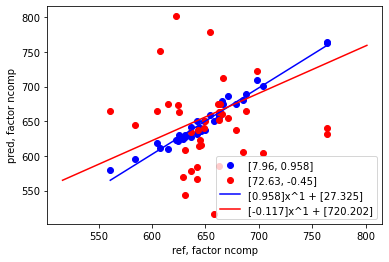

ncomp 16
R2 0.9637135729102362
RMSE 7.411627535656508
R2_cv2 -0.4412505953423391
RMSE_cv 74.74032198346534


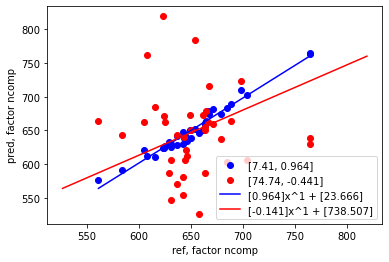

ncomp 17
R2 0.9738643456962762
RMSE 6.290108991693413
R2_cv2 -0.4796912108401792
RMSE_cv 75.17425662617877


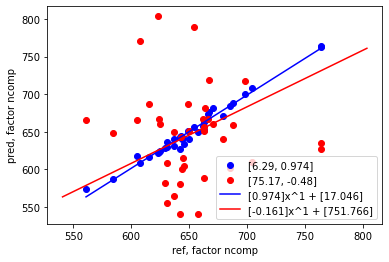

ncomp 18
R2 0.9833560395388377
RMSE 5.019608197848088
R2_cv2 -0.46907858186414897
RMSE_cv 74.10489617500943


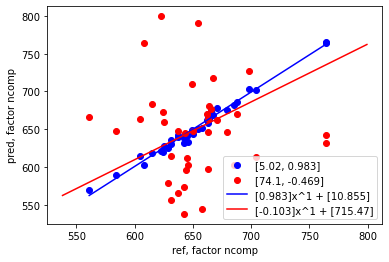

ncomp 19
R2 0.9887641596289025
RMSE 4.124243156558258
R2_cv2 -0.4563560902030819
RMSE_cv 72.62950267126186


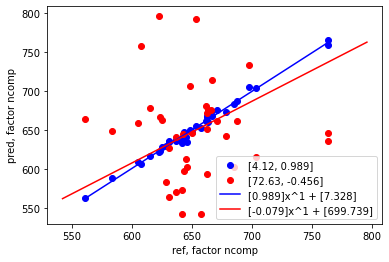

In [32]:
for i in range(2, 20):
    PLS1(Xsnv, Y_oses, i)

ncomp 11
R2 0.8670848226454748
RMSE 14.184981369958194
R2_cv2 -0.4597697649591279
RMSE_cv 60.407264687471894


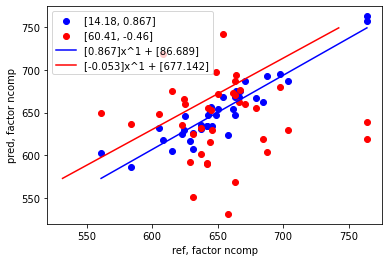

In [33]:
#PLS1 oses
#afin de simplifier, nous allons reprendre le script précédent


#PLS1 oses à 5 composantes.
PLS1(Xsnv, Y_oses, 11)

In [34]:
#résutlat inutiliable.

ncomp 2
R2 0.6421367403497844
RMSE 11.0094900389164
R2_cv2 0.4456643196545105
RMSE_cv 17.29652325828201


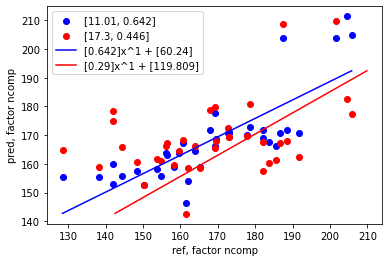

ncomp 3
R2 0.7765803173383838
RMSE 8.699000612899802
R2_cv2 0.8100173201361085
RMSE_cv 13.043651250553804


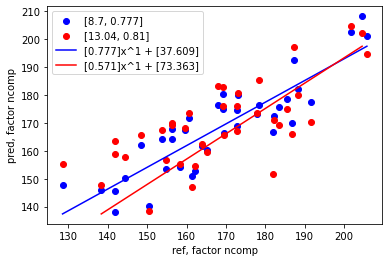

ncomp 4
R2 0.7974468684265341
RMSE 8.282818162102021
R2_cv2 0.9138087870159607
RMSE_cv 11.504648309202395


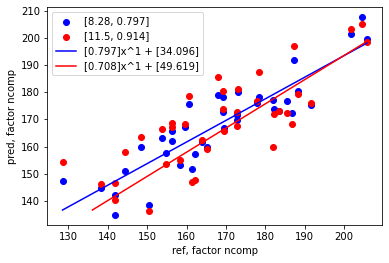

ncomp 5
R2 0.880851161796899
RMSE 6.352629867242264
R2_cv2 0.8223956992375318
RMSE_cv 10.833810603443476


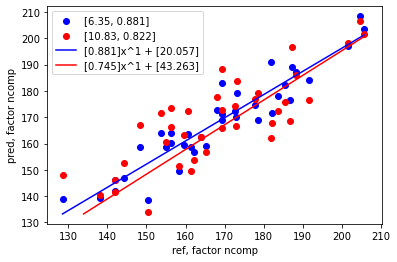

ncomp 6
R2 0.9465365165223595
RMSE 4.255369458915317
R2_cv2 0.8550297580155275
RMSE_cv 9.265304015952129


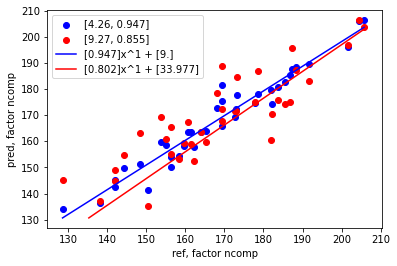

ncomp 7
R2 0.9529105833346269
RMSE 3.9936527622096
R2_cv2 0.8232377187383658
RMSE_cv 9.990421170066785


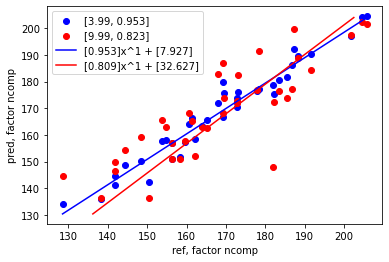

ncomp 8
R2 0.9578187120191672
RMSE 3.779797769465342
R2_cv2 0.8155813385883275
RMSE_cv 10.0516495104811


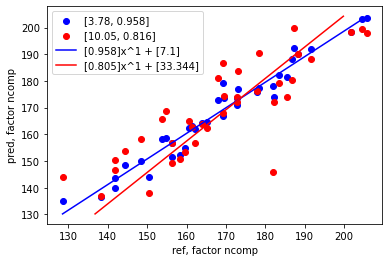

ncomp 9
R2 0.962817257565763
RMSE 3.5487822745351845
R2_cv2 0.7875709455277955
RMSE_cv 10.629476709865623


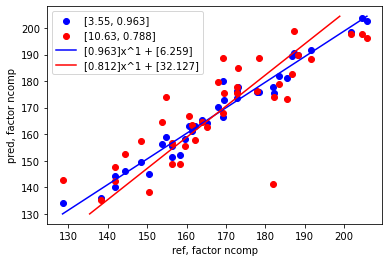

ncomp 10
R2 0.9704612678598127
RMSE 3.1630391797256743
R2_cv2 0.6517080091585223
RMSE_cv 12.743208758606306


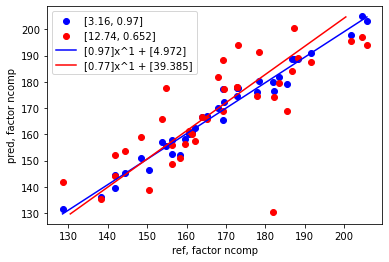

ncomp 11
R2 0.9777192869766712
RMSE 2.7470919015320883
R2_cv2 0.5179887696612206
RMSE_cv 14.8912068964278


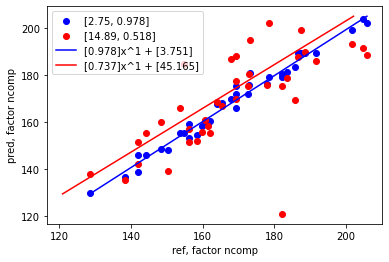

ncomp 12
R2 0.9838337339823972
RMSE 2.3399873336159898
R2_cv2 0.46517410743672594
RMSE_cv 15.910050531150038


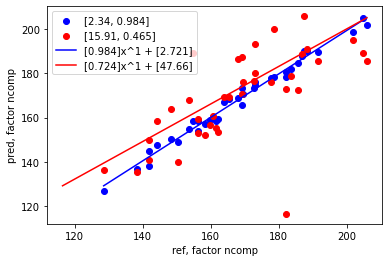

ncomp 13
R2 0.9890837466281844
RMSE 1.9228501912530902
R2_cv2 0.37188285673946986
RMSE_cv 16.754409777742737


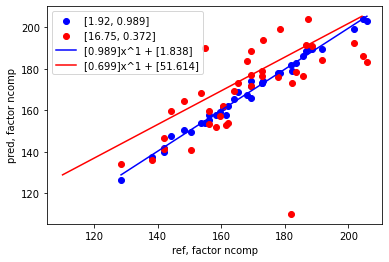

ncomp 14
R2 0.9922283505037726
RMSE 1.6224273129974245
R2_cv2 0.38429520733396416
RMSE_cv 16.516531923929563


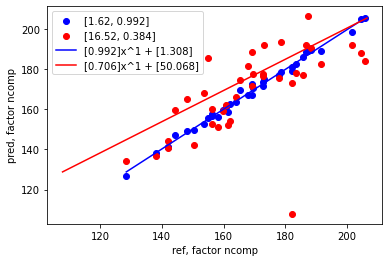

ncomp 15
R2 0.9945113450260907
RMSE 1.3634575204387576
R2_cv2 0.3916222244258052
RMSE_cv 16.225249458861636


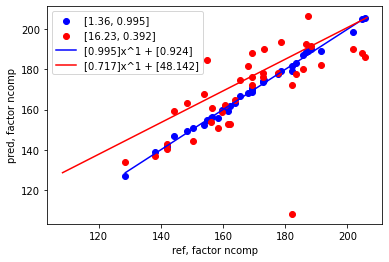

ncomp 16
R2 0.9960033378616648
RMSE 1.163475826218582
R2_cv2 0.364175774078322
RMSE_cv 16.567134841788018


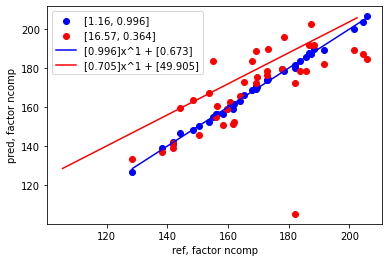

ncomp 17
R2 0.9972748051479804
RMSE 0.960743436250593
R2_cv2 0.37296782359638037
RMSE_cv 16.52208829407539


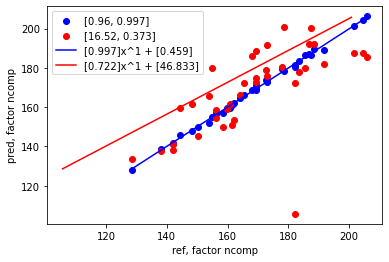

ncomp 18
R2 0.9983017563816557
RMSE 0.7584180173598295
R2_cv2 0.3688336214255157
RMSE_cv 17.013639260127043


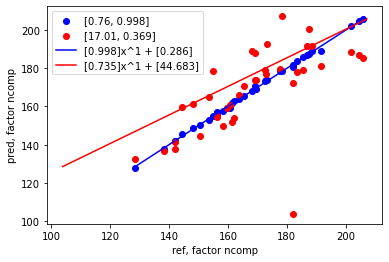

ncomp 19
R2 0.9988878997392133
RMSE 0.6137346135655367
R2_cv2 0.3767692604207741
RMSE_cv 16.97758360199079


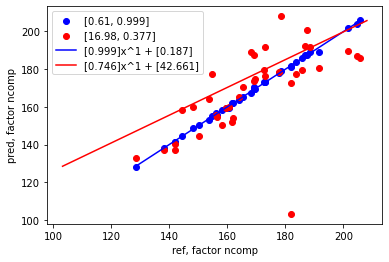

In [35]:
for i in range(2, 20):
    PLS1(Xsnv, Y_LK, i)

ncomp 9
R2 0.962817257565763
RMSE 3.5487822745351845
R2_cv2 0.7875709455277955
RMSE_cv 10.629476709865623


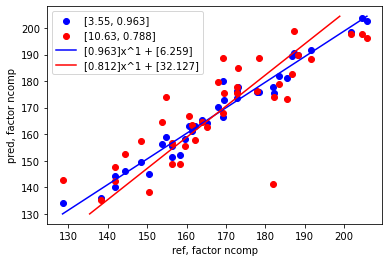

In [36]:
#PLS1 LIGNE KLASON
#afin de simplifier, nous allons reprendre le script précédent


#PLS1 LK à 10 composantes.
PLS1(Xsnv, Y_LK, 9)

In [37]:
#résultat pred LK satisfaisant

In [38]:
#avec les spectres dérivés...

ncomp 3
R2 0.9706041807743625
RMSE 1.4180481070266582
R2_cv2 0.921782202958286
RMSE_cv 2.8886822564915335


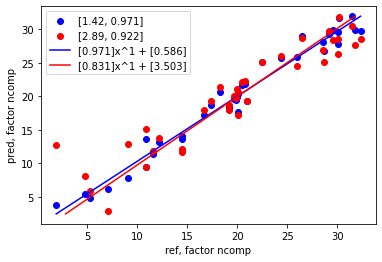

In [50]:
#PLS1 pcoum à 7 composantes.
PLS1(X2snv, Y_pcoum, 3)
#ça marche encore mieux

ncomp 3
R2 0.8156905873524165
RMSE 0.5462435040720371
R2_cv2 0.43438001243915103
RMSE_cv 1.0175511520260179


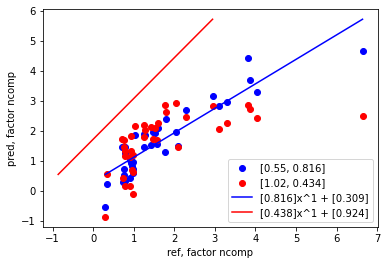

In [53]:
PLS1(X2snv, Y_SG, 3)

ncomp 2
R2 0.5776511289691235
RMSE 25.285826344047234
R2_cv2 0.21176690024391087
RMSE_cv 41.28170610101802


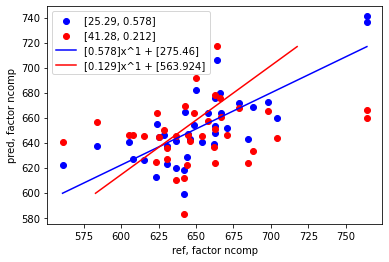

In [55]:
PLS1(X2snv, Y_oses, 2)

ncomp 6
R2 0.9541788047387065
RMSE 3.939506786747058
R2_cv2 0.5994613109946447
RMSE_cv 12.851428172033373


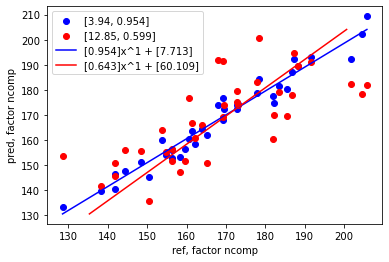

In [59]:
PLS1(X2snv, Y_LK, 6)

In [43]:
#le mais 9f "tire" la calibration. Il y a au moins 1 outlier en plus.

ncomp 7
R2 0.9701210211703717
RMSE 2.426265858946952
R2_cv2 0.8231187425356592
RMSE_cv 6.287798212604717


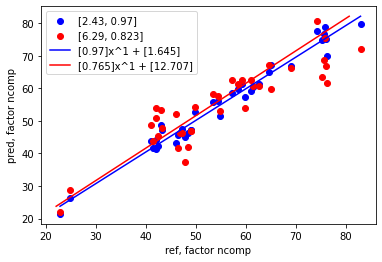

In [65]:
PLS1(X2snv, Y_syr, 7)

ncomp 7
R2 0.9700446792090803
RMSE 2.4983872248166334
R2_cv2 0.8286650503831261
RMSE_cv 6.383340643543961


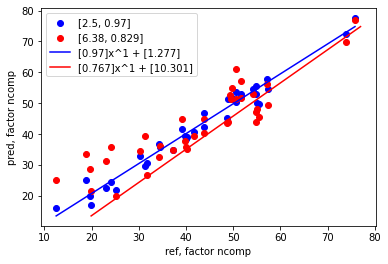

In [66]:
PLS1(X2snv, Y_gua, 7)

In [46]:
#si le S/G n'est pas prédictible, en revanche le syringyle l'est. 1 outlier (le Mais 9F)
#de même pour le guaiacyl.

In [47]:
#résultats franchement mitigés.
#sans doute du à la faible quantité de données.

